In [2]:
import os
import pandas as pd
import numpy as np
import json
import pickle
from pprint import pprint
from collections import defaultdict
from pathlib import Path
from sklearn.metrics import ndcg_score, dcg_score
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
    
from src.data import load_source
from src.config import Config, get_option_fallback
from src.path import get_best_model_paths, get_exp_paths, get_report_path, load_json, load_rep_cfg
from knowledge_tracing.trainer import Trainer

In [3]:
projectdir = Path('/code')
assert projectdir.exists()

# `20_0305_edm2020_assist09`

In [45]:
seq_size = 20
simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)[::-1]]
# simu = [[1]*i + [0]*(seq_size - i) for i in range(seq_size+1)]
# simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size)] + [[1]*i + [0]*(seq_size - i) for i in range(seq_size)]

In [46]:
[sum(s) for s in simu]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [81]:
def get_simu_res(trainer, simu, kc_id):
    seq_size = trainer.config.sequence_size
    v = kc_id
    xs = []
    preds = []
    for s in simu:
        res = trainer.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.BoolTensor([True]*seq_size).unsqueeze(0),)
        preds.append(res['pred_prob'][-1].item())
        xs.append(sum(s))
    return (xs, preds)

def get_simu_res_vect(trainer, simu, kc_id):
    seq_size = trainer.config.sequence_size
    v = kc_id
    xs = []
    preds = []
    for s in simu:
        res = trainer.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.BoolTensor([True]*seq_size).unsqueeze(0),)
        preds.append(res['pred_vect'][-1].detach().cpu().numpy())
        xs.append(sum(s))
#     return (xs, preds)
    return (preds)

def get_simu_res_vect_pad(trainer, kc_id):
    seq_size = trainer.config.sequence_size
    v = kc_id
    xs = []
    preds = []
    s = [1] * seq_size
    for b in range(seq_size+1):
        res = trainer.model.loss_batch(
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.Tensor([(v,a) for a in s]).unsqueeze(0),
            torch.BoolTensor([True]*seq_size + [False]*(seq_size-b)).unsqueeze(0),)
        preds.append(res['pred_vect'][-1].detach().cpu().numpy())
        xs.append(sum(s))
    return (preds)

In [102]:
config_name = '20_0305_edm2020_assist09'
config_dicts = []
for c in sorted([load_rep_cfg(get_report_path(projectdir, e)) for e in get_exp_paths(projectdir, config_name)], key=lambda x: x['pre_dummy_epoch_size']):
    if len(get_best_model_paths(projectdir, c)) == 0:
        raise (c['exp_name'])
    c['load_model'] = get_best_model_paths(projectdir, c)[-1]
    config_dicts.append(c)
    
# config_dicts = [c for c in config_dicts
#  if c['pre_dummy_epoch_size'] in {0, 10, 150}]
[c['exp_name'] for c in config_dicts]

['pre_dummy_epoch_size0.auto',
 'pre_dummy_epoch_size3.auto',
 'pre_dummy_epoch_size8.auto',
 'pre_dummy_epoch_size20.auto',
 'pre_dummy_epoch_size50.auto',
 'pre_dummy_epoch_size150.auto',
 'pre_dummy_epoch_size400.auto']

In [23]:
config_dic = config_dicts[0]
config = Config(config_dic, projectdir)
config.batch_size = 1
trainer = Trainer(config)
trainer.init_model()
trainer.load_model()

INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| The model has 511,442 trainable parameters
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size0.auto 	| The model has 511,442 trainable parameters
INFO : 2013 : 02:18 : ksdkt/pre_dummy_epoch_size

In [93]:
config_dic = config_dicts[2]
config = Config(config_dic, projectdir)
config.batch_size = 1
trainer2 = Trainer(config)
trainer2.init_model()
trainer2.load_model()

INFO : 2013 : 11:53 : ksdkt/pre_dummy_epoch_size8.auto 	| PyTorch: 1.3.0
INFO : 2013 : 11:53 : ksdkt/pre_dummy_epoch_size8.auto 	| Using Device: cuda
INFO : 2013 : 11:53 : ksdkt/pre_dummy_epoch_size8.auto 	| The model has 511,442 trainable parameters
INFO : 2013 : 11:53 : ksdkt/pre_dummy_epoch_size8.auto 	| Loading model /code/output/20_0305_edm2020_assist09/pre_dummy_epoch_size8.auto/checkpoints/20200305-0842/f4_best.model


In [103]:
config_dic = config_dicts[-1]
config = Config(config_dic, projectdir)
config.batch_size = 1
trainer3 = Trainer(config)
trainer3.init_model()
trainer3.load_model()

INFO : 2013 : 12:18 : ksdkt/pre_dummy_epoch_size400.auto 	| PyTorch: 1.3.0
INFO : 2013 : 12:18 : ksdkt/pre_dummy_epoch_size400.auto 	| Using Device: cuda
INFO : 2013 : 12:18 : ksdkt/pre_dummy_epoch_size400.auto 	| The model has 511,442 trainable parameters
INFO : 2013 : 12:18 : ksdkt/pre_dummy_epoch_size400.auto 	| Loading model /code/output/20_0305_edm2020_assist09/pre_dummy_epoch_size400.auto/checkpoints/20200305-1519/f4_best.model


In [68]:
# Single results
simures_list = dict()
n_skills = 110
for kc_id in range(n_skills):
    simu_res = get_simu_res(trainer, simu, kc_id)
    simures_list[kc_id] = simu_res
    

In [69]:
# base_res = {k:v for k, v in sorted(simures_list.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
base_res = {k:v for k, v in simures_list.items()}
base_res

{0: ([0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20],
  [0.2256348431110382,
   0.2777649462223053,
   0.3912970721721649,
   0.4354372024536133,
   0.4994570016860962,
   0.5454325675964355,
   0.5875797271728516,
   0.6280058026313782,
   0.6692385077476501,
   0.7706620097160339,
   0.8253354430198669,
   0.8195112943649292,
   0.8105831742286682,
   0.8177788853645325,
   0.8236881494522095,
   0.8403787016868591,
   0.8545774817466736,
   0.8410038352012634,
   0.8460520505905151,
   0.8224578499794006,
   0.8308436274528503]),
 1: ([0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20],
  [0.14972881972789764,
   0.24525386095046997,
   0.3867810368537903,
   0.5562109351158142,
   0.6462746858596802,
   0.6904212832450867,
   0.6970818042755127,
   0.6831179261207581,
   0.717782735824585,
   0.6667829155921936,
  

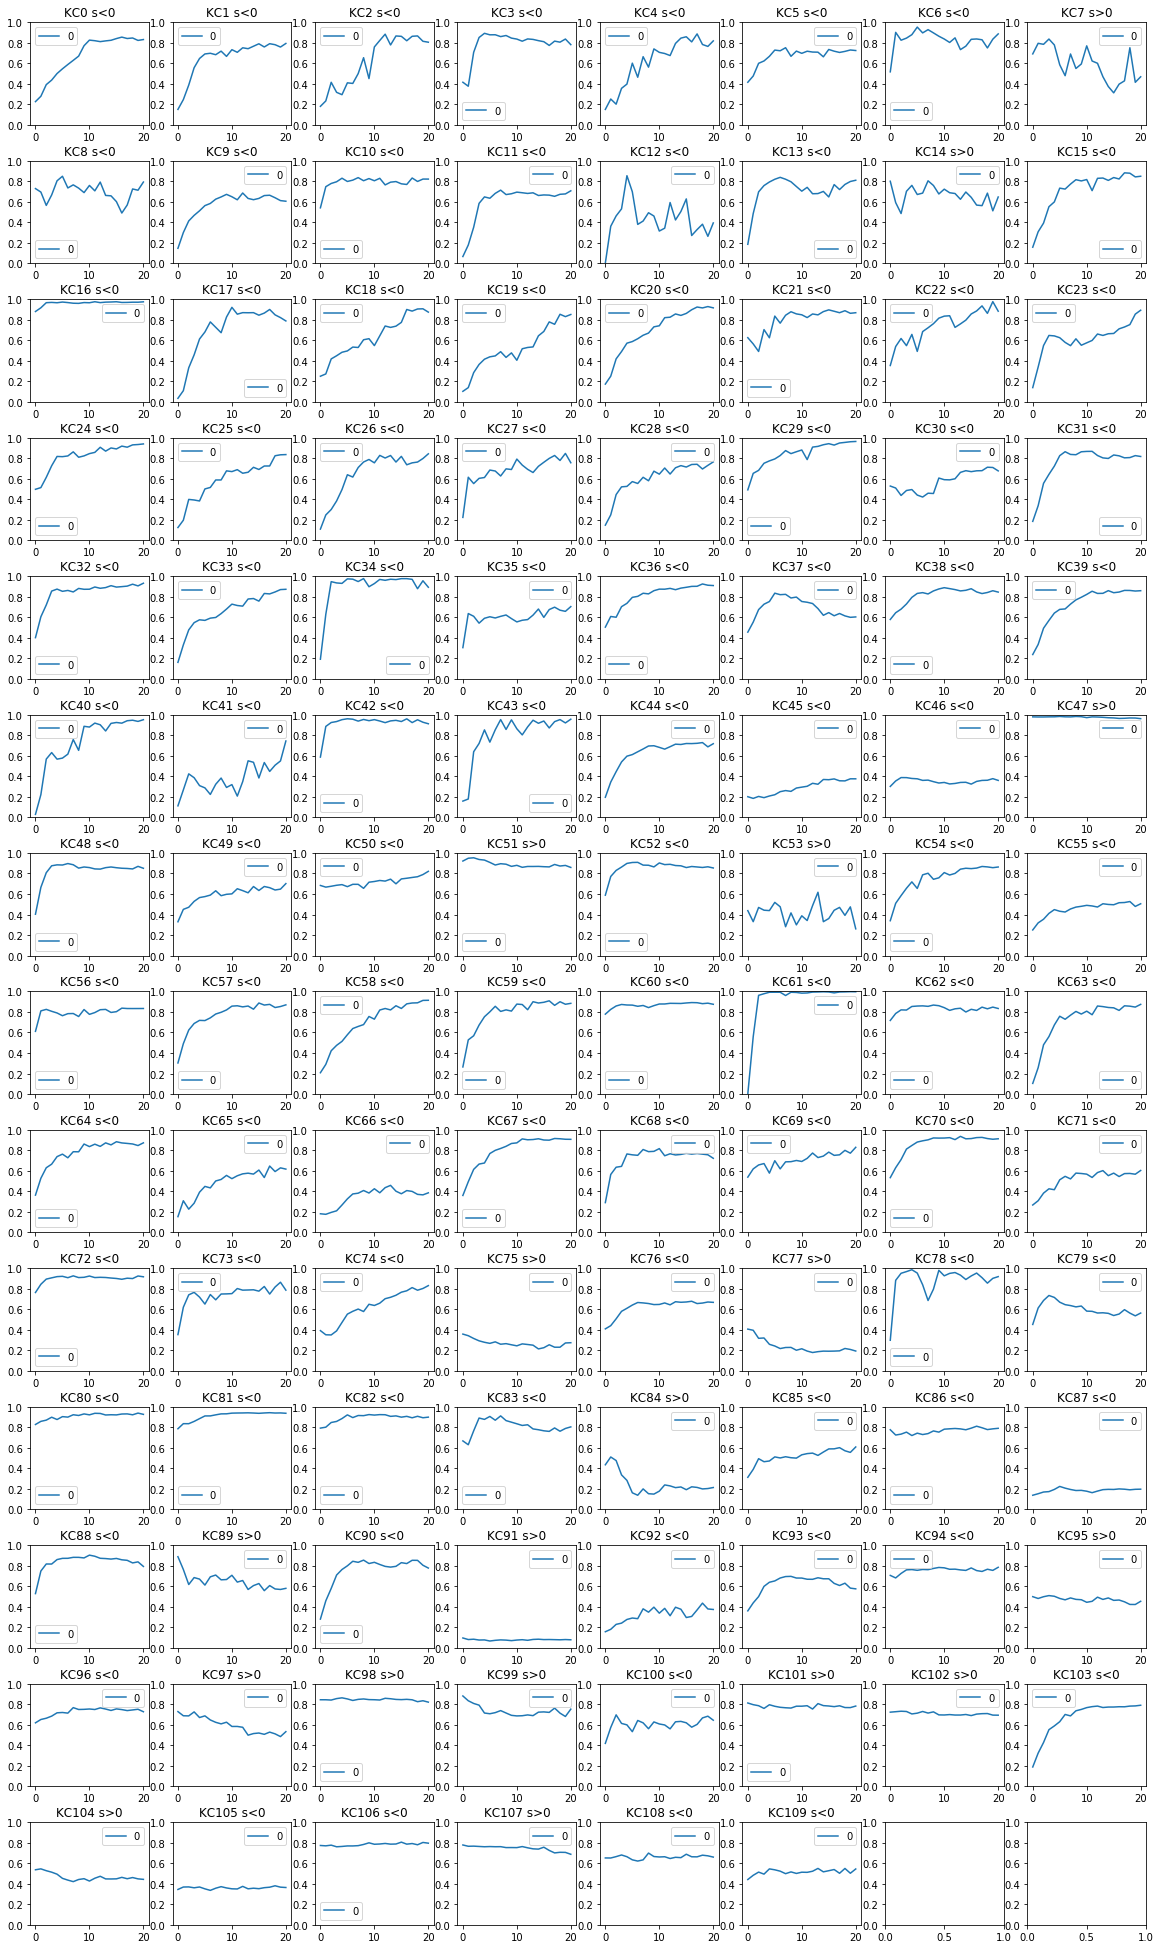

In [70]:
h, w = (n_skills+7)//8, 8
figscale = 2.5
hspace = 0.35
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
plt.subplots_adjust(hspace=hspace)
for i, (v, (xidx, sanity)) in enumerate(list(base_res.items())[:h*w]):
    ax = axs[i//(w), i%(w)]
    ax.set_ylim([0, 1])
    ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
    sns.lineplot(xidx, sanity, ax=ax, label='0', palette="ch:2.5,.25")
# ax.legend()
plt.show()

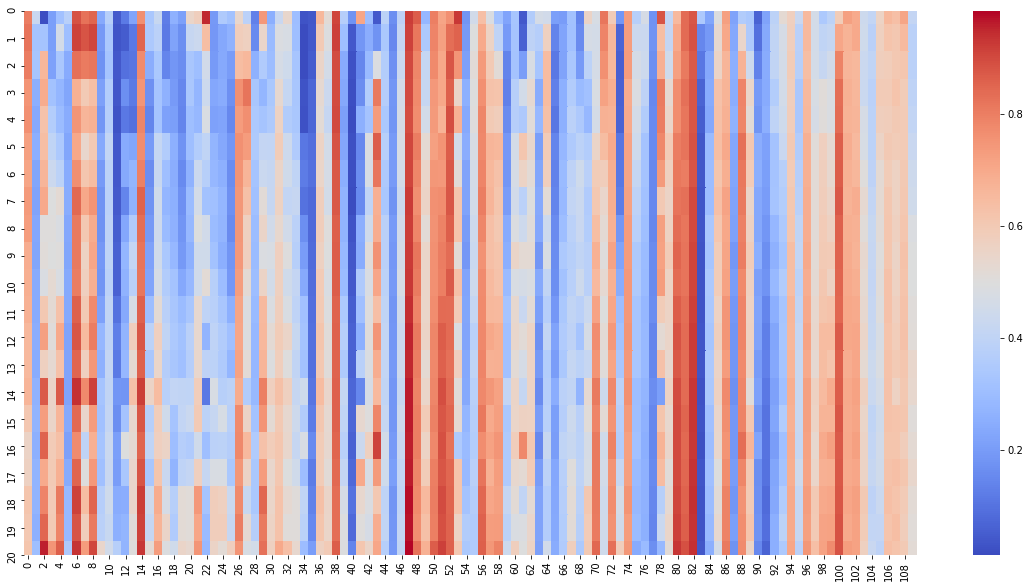

In [47]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
simu_res = get_simu_res_vect(trainer, simu, kc_id=7)
plt.figure(figsize=(20,10))
sns.heatmap(np.concatenate(simu_res), cmap='coolwarm')

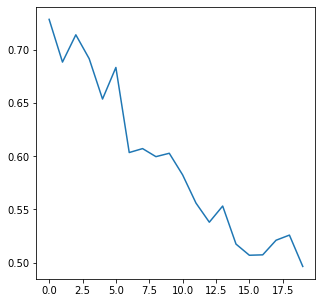

In [80]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
simu_res = get_simu_res_vect(trainer, simu, kc_id=97)
# for i in range(len(simu_res)-1,0,-1):
#     simu_res[i] = simu_res[i] - simu_res[i-1]
# plt.figure(figsize=(20,10))
plt.figure(figsize=(5,5))
# vmin, vmax = -1, 1
# vmin, vmax = -.5, .5
# vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
# sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)
# print(np.concatenate(simu_res)[1:,97])
sns.lineplot(x=list(range(20)), y=np.concatenate(simu_res)[1:,97])

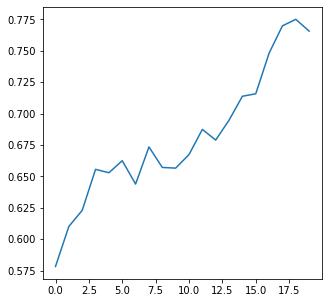

In [108]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
simu_res = get_simu_res_vect(trainer, simu, kc_id=25)
# for i in range(len(simu_res)-1,0,-1):
#     simu_res[i] = simu_res[i] - simu_res[i-1]
# plt.figure(figsize=(20,10))
plt.figure(figsize=(5,5))
# vmin, vmax = -1, 1
# vmin, vmax = -.5, .5
# vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
# sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)
# print(np.concatenate(simu_res)[1:,97])
sns.lineplot(x=list(range(20)), y=np.concatenate(simu_res)[1:,97])

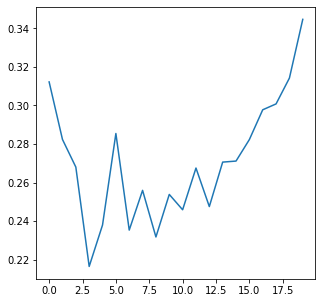

In [94]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
simu_res = get_simu_res_vect(trainer2, simu, kc_id=97)
# for i in range(len(simu_res)-1,0,-1):
#     simu_res[i] = simu_res[i] - simu_res[i-1]
# plt.figure(figsize=(20,10))
plt.figure(figsize=(5,5))
# vmin, vmax = -1, 1
# vmin, vmax = -.5, .5
# vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
# sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)
# print(np.concatenate(simu_res)[1:,97])
sns.lineplot(x=list(range(20)), y=np.concatenate(simu_res)[1:,97])

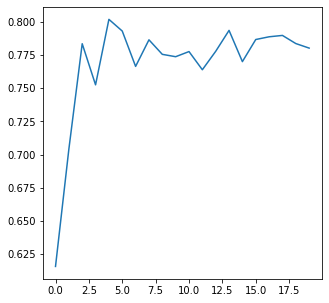

In [104]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
simu_res = get_simu_res_vect(trainer3, simu, kc_id=97)
# for i in range(len(simu_res)-1,0,-1):
#     simu_res[i] = simu_res[i] - simu_res[i-1]
# plt.figure(figsize=(20,10))
plt.figure(figsize=(5,5))
# vmin, vmax = -1, 1
# vmin, vmax = -.5, .5
# vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
# sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)
# print(np.concatenate(simu_res)[1:,97])
sns.lineplot(x=list(range(20)), y=np.concatenate(simu_res)[1:,97])

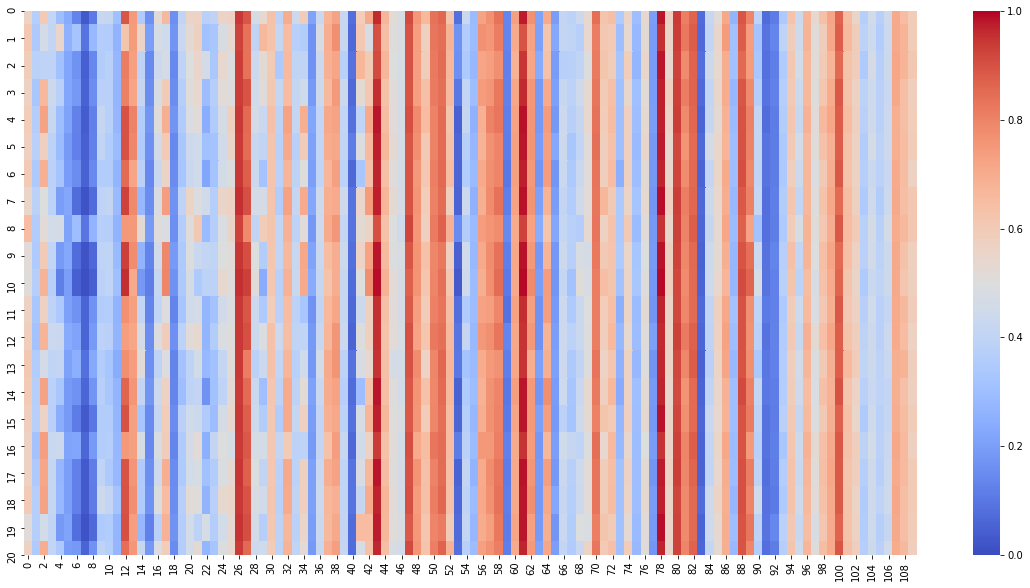

In [86]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
simu_res = get_simu_res_vect_pad(trainer, kc_id=97)
# for i in range(len(simu_res)-1,0,-1):
#     simu_res[i] = simu_res[i] - simu_res[i-1]
plt.figure(figsize=(20,10))
# plt.figure(figsize=(5,5))
# vmin, vmax = -1, 1
# vmin, vmax = -.5, .5
# vmin, vmax = -.1, .1
vmin, vmax = 0, 1
sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)
# print(np.concatenate(simu_res)[1:,97])
# sns.lineplot(x=list(range(20)), y=np.concatenate(simu_res)[1:,97])

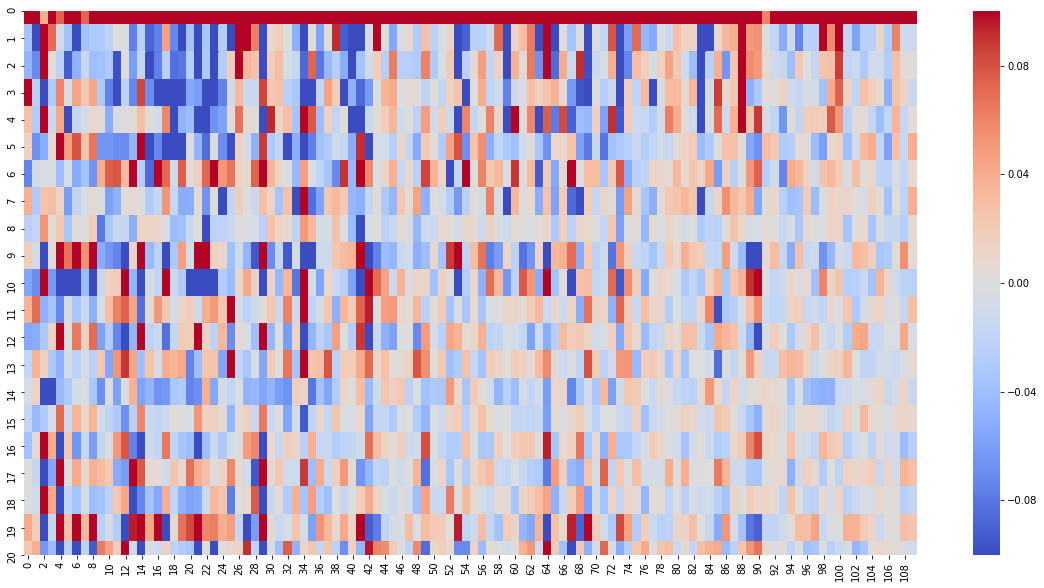

In [98]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
# simu_res = get_simu_res_vect_pad(trainer, kc_id=97)
simu_res = get_simu_res_vect(trainer, simu, kc_id=97)
for i in range(len(simu_res)-1,0,-1):
    simu_res[i] = simu_res[i] - simu_res[i-1]
plt.figure(figsize=(20,10))
# plt.figure(figsize=(5,5))
vmin, vmax = -1, 1
vmin, vmax = -.5, .5
vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)
# print(np.concatenate(simu_res)[1:,97])
# sns.lineplot(x=list(range(20)), y=np.concatenate(simu_res)[1:,97])

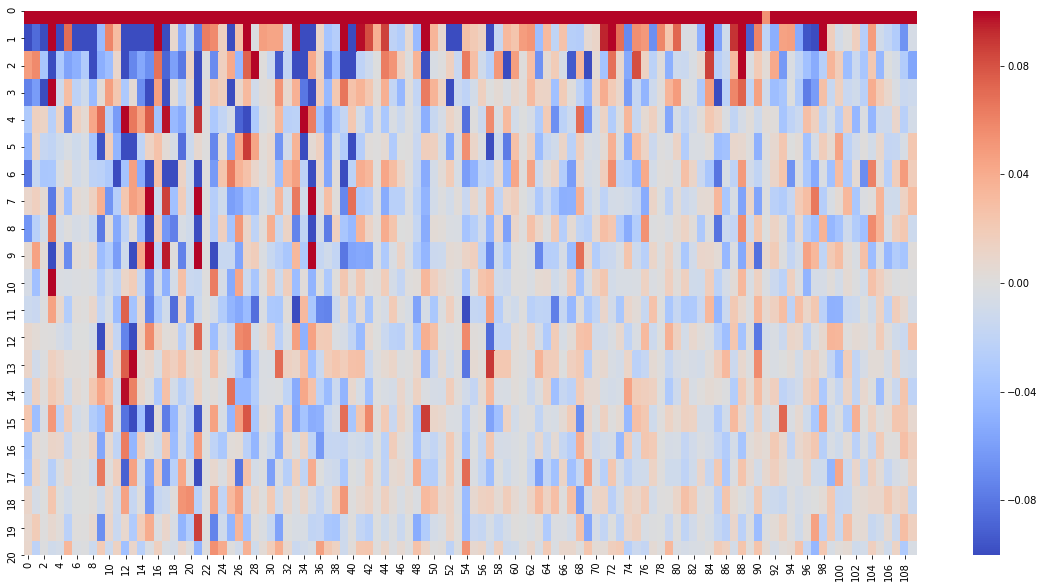

In [97]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
# simu_res = get_simu_res_vect_pad(trainer2, kc_id=97)
simu_res = get_simu_res_vect(trainer2, simu, kc_id=97)
for i in range(len(simu_res)-1,0,-1):
    simu_res[i] = simu_res[i] - simu_res[i-1]
plt.figure(figsize=(20,10))
# plt.figure(figsize=(5,5))
vmin, vmax = -1, 1
vmin, vmax = -.5, .5
vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)
# print(np.concatenate(simu_res)[1:,97])
# sns.lineplot(x=list(range(20)), y=np.concatenate(simu_res)[1:,97])

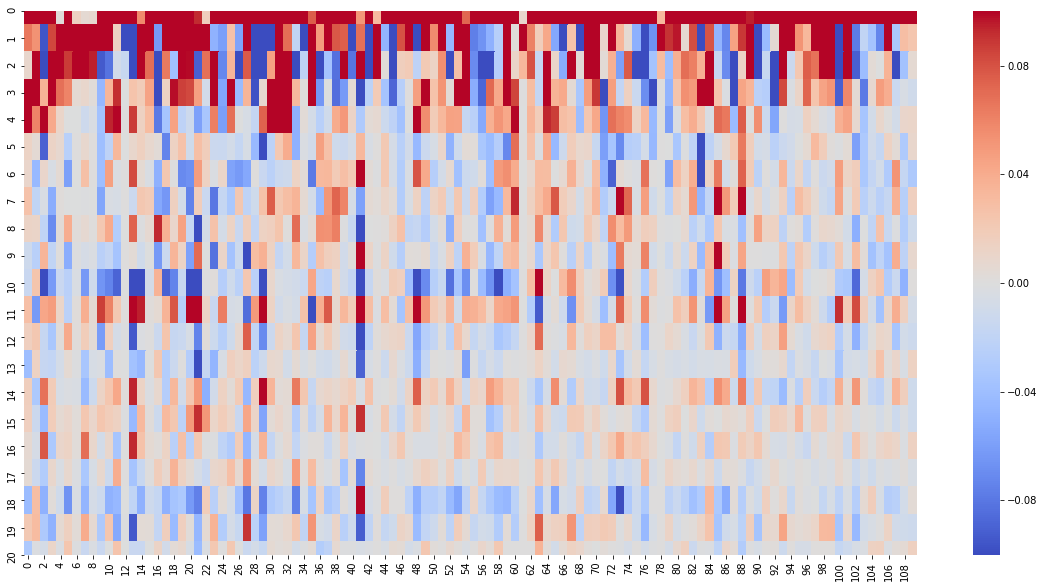

In [107]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
# simu_res = get_simu_res_vect_pad(trainer2, kc_id=97)
simu_res = get_simu_res_vect(trainer3, simu, kc_id=97)
for i in range(len(simu_res)-1,0,-1):
    simu_res[i] = simu_res[i] - simu_res[i-1]
plt.figure(figsize=(20,10))
# plt.figure(figsize=(5,5))
vmin, vmax = -1, 1
vmin, vmax = -.5, .5
vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)
# print(np.concatenate(simu_res)[1:,97])
# sns.lineplot(x=list(range(20)), y=np.concatenate(simu_res)[1:,97])

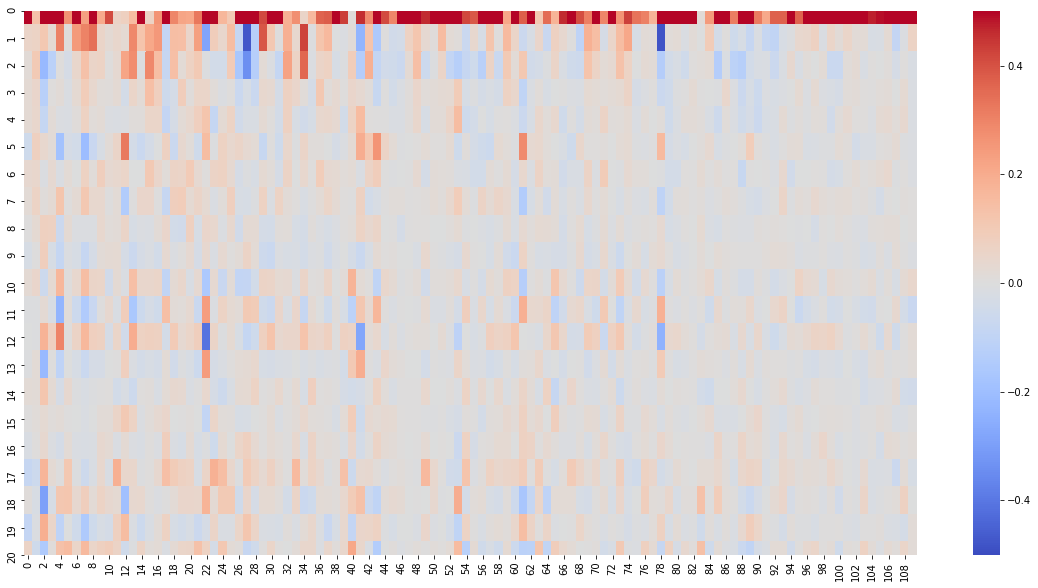

In [63]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
simu_res = get_simu_res_vect(trainer, simu, kc_id=25)
for i in range(len(simu_res)-1,0,-1):
    simu_res[i] = simu_res[i] - simu_res[i-1]
plt.figure(figsize=(20,10))
# vmin, vmax = -1, 1
vmin, vmax = -.5, .5
# vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)

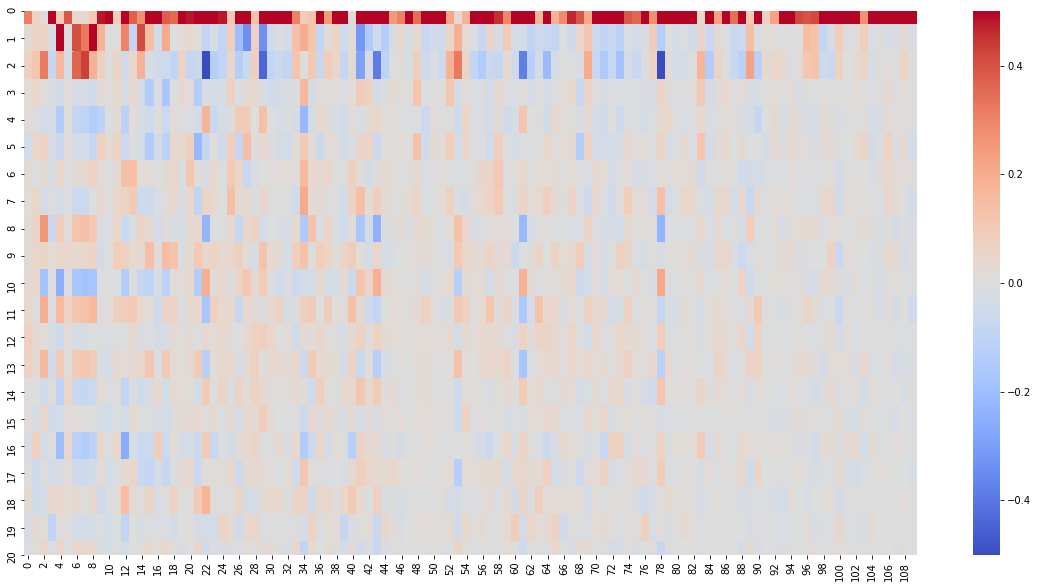

In [96]:
# Single vector results in sequence
simures_list = dict()
n_skills = 110
simu_res = get_simu_res_vect(trainer2, simu, kc_id=25)
for i in range(len(simu_res)-1,0,-1):
    simu_res[i] = simu_res[i] - simu_res[i-1]
plt.figure(figsize=(20,10))
# vmin, vmax = -1, 1
vmin, vmax = -.5, .5
# vmin, vmax = -.1, .1
# vmin, vmax = 0, 1
sns.heatmap(np.concatenate(simu_res), cmap='coolwarm', vmin=vmin, vmax=vmax)

In [12]:
# # Grid results
# simures_list = []
# for config_dic in config_dicts:
#     simu_res = get_simu_res(config_dic)
#     simures_list.append(simu_res)
# base_res = None
# descres_list = []
# for simu_res in simures_list:
#     if base_res is None:
#         base_res = {k:v for k, v in sorted(simu_res.items(), key=lambda it: it[1][1][0] - it[1][1][-1])}
#     else:
#         desc_res = {k:simu_res[k] for k in base_res.keys()}
#         descres_list.append(desc_res)

INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| The model has 514,424 trainable parameters
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| The model has 514,424 trainable parameters
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| The model has 514,424 trainable parameters
INFO : 1348 : 19:50 : ksdkt/pre_dummy_epoch_size0.auto 	| The model has 514,424 trainable paramet

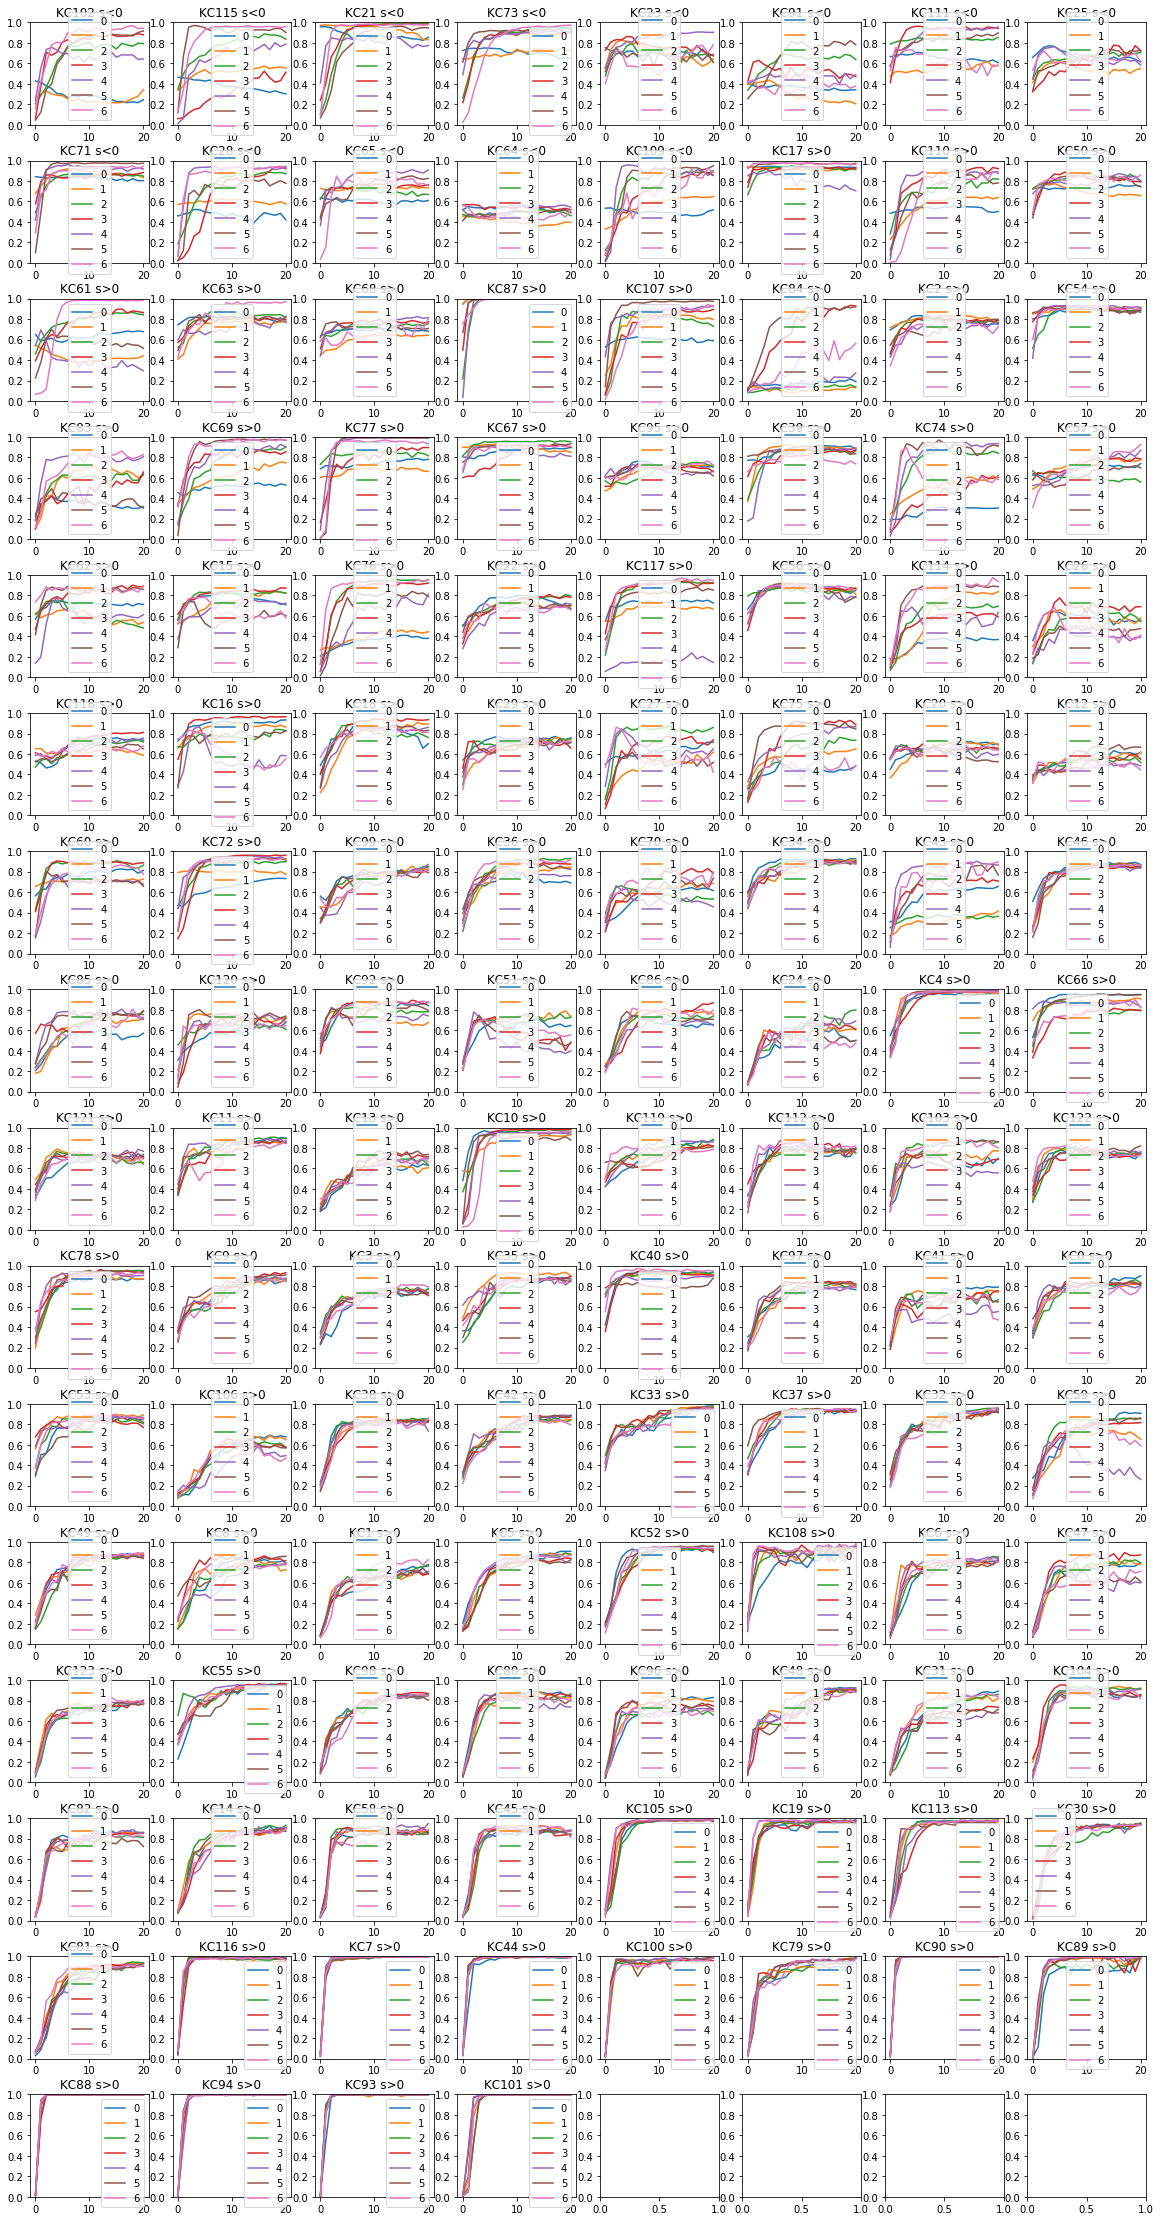

In [15]:
h, w = (124+7)//8, 8
figscale = 2.5
hspace = 0.35
fig, axs = plt.subplots(h, w, figsize=(w*figscale, h*figscale))
plt.subplots_adjust(hspace=hspace)
for i, (v, (xidx, sanity)) in enumerate(list(base_res.items())[:h*w]):
    ax = axs[i//(w), i%(w)]
    ax.set_ylim([0, 1])
    ax.set_title('KC{} s{}0'.format(v, '>' if sanity[-1]<sanity[0] else '<'))
    sns.lineplot(xidx, sanity, ax=ax, label='0', palette="ch:2.5,.25")
    for i, desc_res in enumerate(descres_list):
        sns.lineplot(xidx, desc_res[v][1], ax=ax, label=str(i+1), palette="ch:2.5,.25")
ax.legend()
plt.show()

In [20]:
def get_simu_res_ndcg(config_dic, ndcg=ndcg_score):
    config = Config(config_dic, projectdir)
    config.batch_size = 1
    trainer = Trainer(config)
    trainer.init_model()
    trainer.load_model()

    seq_size = config.sequence_size
#     simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size+1)]
    simu = [[1]*i + [0]*(seq_size - i) for i in range(seq_size+1)]
#     simu = [[0]*i + [1]*(seq_size - i) for i in range(seq_size)] + [[1]*i + [0]*(seq_size - i) for i in range(seq_size)]

    simu_res = dict()
    simu_ndcg = []
    for v in range(config.n_skills):
        xs = []
        preds = []
        for s in simu:
            res = trainer.model.loss_batch(
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.Tensor([(v,a) for a in s]).unsqueeze(0),
                torch.BoolTensor([True]*seq_size).unsqueeze(0),)
            preds.append(res['pred_prob'][-1].item())
            xs.append(sum(s))
        simu_res[v] = (xs, preds)
        simu_ndcg.append(ndcg(np.asarray([xs]), np.asarray([preds])))
    return simu_ndcg

In [28]:
res = {}
for config_dic in config_dicts:
    if config_dic['pre_dummy_epoch_size'] not in {0, 10}:
        continue
    simu_ndcg_list = get_simu_res_ndcg(config_dic)
#     name = config_dic['exp_name']
    name = 'DKT pre {}'.format(config_dic['pre_dummy_epoch_size'])
    res[name] = simu_ndcg_list

INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 20:46 : ksdkt/pre_dummy_epoch

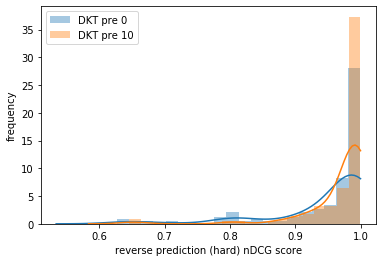

In [31]:
for name, s in res.items(): 
    sns.distplot(s, bins=20, label=name, kde_kws={'clip': (0.0, 1.0)})
plt.xlabel('reverse prediction (hard) nDCG score')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [19]:
res = {}
for config_dic in config_dicts:
    simu_ndcg_list = get_simu_res_ndcg(config_dic)
    s = pd.Series(simu_ndcg_list)
    res[config_dic['exp_name']] = s

for name, s in res.items():
    print(f'name: {s.mean()} {s.std()}')

INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| PyTorch: 1.3.0
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 20:26 : ksdkt/pre_dummy_epoch_size0.auto 	| Using Device: cuda
INFO : 1348 : 20:26 : ksdkt

name: 0.9454485671802546 0.08459334255364839
name: 0.9549549050184091 0.08182932534382228
name: 0.9717294104039514 0.052219225651811474
name: 0.9699291570562051 0.053380750999893305
name: 0.9646727686956064 0.042749367423833916
name: 0.9737493067875647 0.039395427236744926
name: 0.9651074851808593 0.06005180593269344


# Learning curve for `20_0220_edm2020_asmt15`

In [17]:
config_name = '20_0220_edm2020_asmt15'
report_dicts = [load_json(get_report_path(projectdir, e)) for e in get_exp_paths(projectdir, config_name)]
report_dicts = sorted(report_dicts, key=lambda r: r['config']['sequence_size'])
[r['config']['exp_name'] for r in report_dicts]

['sequence_size15padTrue.auto',
 'sequence_size15padFalse.auto',
 'sequence_size20padFalse.auto',
 'sequence_size20padTrue.auto',
 'sequence_size30padFalse.auto',
 'sequence_size30padTrue.auto',
 'sequence_size40padFalse.auto',
 'sequence_size40padTrue.auto',
 'sequence_size50padFalse.auto',
 'sequence_size50padTrue.auto',
 'sequence_size100padFalse.auto',
 'sequence_size100padTrue.auto']

In [22]:
def show_learning_curve(name, jack_up, idclist_dic, idc='eval_auc'):
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     x = np.transpose(np.array(list(idclist_dic['epoch'].values())))
    x = idclist_dic['epoch']['0'] * 5
    x = [i+jack_up for i in x]
    y = []
    for _y in idclist_dic[idc].values():
        y += _y
#         ax.plot(x, y, label=k.replace('_', ' '))
    sns.lineplot(x=x, y=y, label=name)
    plt.title(idc)
#     ax.legend()
#     ax.set_ylim(0., 1.)
#     plt.savefig(outdir / f'{config.model_name}_lc.png')

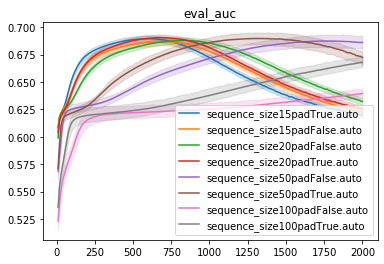

In [23]:
for r in report_dicts:
    show_learning_curve(r['config']['exp_name'], 0, r['indicator'])
plt.show()

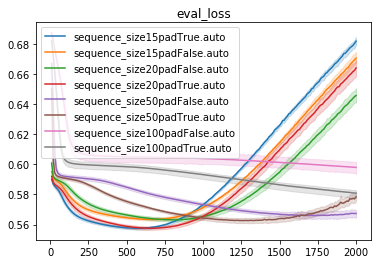

In [24]:
for r in report_dicts:
    show_learning_curve(r['config']['exp_name'], 0, r['indicator'], idc='eval_loss')
plt.show()

# Test auc for `20_0220_edm2020_asmt15`

In [41]:
def summarize_test_res(rep):
    print(rep['config']['exp_name'], end=':\t')
    s = pd.Series([f for f in rep['best']['auc_epoch'].values()])
    print(f'Best epoch at {s.mean():>6.1f}±{s.std():<5.1f}', end='\t')
    s = pd.Series([f[0] for f in rep['indicator']['test_auc'].values()])
    print(f'AUC: {s.mean()*100:.4f}±{s.std()*100:.4f}')
    print()

In [42]:
for r in report_dicts:
    summarize_test_res(r)

sequence_size15padTrue.auto:	Best epoch at  600.0±14.1 	AUC: 69.0746±0.1098

sequence_size15padFalse.auto:	Best epoch at  694.0±8.9  	AUC: 68.7875±0.1249

sequence_size20padFalse.auto:	Best epoch at  836.0±31.3 	AUC: 68.8453±0.1469

sequence_size20padTrue.auto:	Best epoch at  686.0±33.6 	AUC: 69.1648±0.1259

sequence_size50padFalse.auto:	Best epoch at 1776.0±68.0 	AUC: 68.5738±0.2209

sequence_size50padTrue.auto:	Best epoch at 1340.0±100.2	AUC: 68.8355±0.1611

sequence_size100padFalse.auto:	Best epoch at 2000.0±0.0  	AUC: 64.0471±0.3785

sequence_size100padTrue.auto:	Best epoch at 2000.0±0.0  	AUC: 66.3083±0.2184

